In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Cargar los datos
df = pd.read_csv(r"C:\it_academy\ProjecteData - Materiales\Sprint04\dfs_medios\df_medios_sector_empresa_23.csv")

print("=== EXPLORACIÓN INICIAL DE LOS DATOS ===")
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())
print("\nColumnas disponibles:")
print(df.columns.tolist())

=== EXPLORACIÓN INICIAL DE LOS DATOS ===
Dimensiones del dataset: (9, 11)

Primeras filas:
   anio                 actividad_economica  total_%  Numero_empresas  \
0  2023                           Industria    100.0            53139   
1  2023                        Construcción    100.0            44603   
2  2023  Comercio y reparación de vehículos    100.0            81250   
3  2023         Transporte y almacenamiento    100.0            19688   
4  2023                          Hostelería    100.0            62597   

   dan_formacion_%  \
0             78.4   
1             79.3   
2             70.7   
3             79.5   
4             58.4   

   Cursos de formación  diseñados y gestionados por su empresa   \
0                                               27.7              
1                                               20.3              
2                                               24.3              
3                                               23.8              
4 

In [23]:
# Identificar los sectores de servicios
print("\n=== IDENTIFICACIÓN DE SECTORES ===")
print("Sectores disponibles:")
for i, sector in enumerate(df['actividad_economica'].unique(), 1):
    print(f"{i}. {sector}")


=== IDENTIFICACIÓN DE SECTORES ===
Sectores disponibles:
1. Industria
2. Construcción
3. Comercio y reparación de vehículos
4. Transporte y almacenamiento
5. Hostelería
6. Información, comunicaciones, actividades financieras, de seguros e inmobiliarias
7. Actividades profesionales, científicas y técnicas
8. Actividades administrativas y servicios auxiliares
9. Actividades artísticas, recreativas y de entretenimiento y otros servicios


In [24]:
# Definir sectores que pertenecen a servicios (todos excepto Industria y Construcción)
sectores_servicios = df[~df['actividad_economica'].isin(['Industria', 'Construcción'])]['actividad_economica'].tolist()
print(f"\nSectores de SERVICIOS ({len(sectores_servicios)}):")
for i, sector in enumerate(sectores_servicios, 1):
    print(f"{i}. {sector}")


Sectores de SERVICIOS (7):
1. Comercio y reparación de vehículos
2. Transporte y almacenamiento
3. Hostelería
4. Información, comunicaciones, actividades financieras, de seguros e inmobiliarias
5. Actividades profesionales, científicas y técnicas
6. Actividades administrativas y servicios auxiliares
7. Actividades artísticas, recreativas y de entretenimiento y otros servicios


In [25]:
# Filtrar datos del sector servicios
df_servicios = df[df['actividad_economica'].isin(sectores_servicios)].copy()
print(f"\n=== DATOS DEL SECTOR SERVICIOS ===")
print(f"Número de subsectores de servicios: {len(df_servicios)}")
print(f"Total de empresas en servicios: {df_servicios['Numero_empresas'].sum():,}")


=== DATOS DEL SECTOR SERVICIOS ===
Número de subsectores de servicios: 7
Total de empresas en servicios: 249,302


In [26]:
# Identificar las columnas de tipos de formación
columnas_formacion = [
    'Cursos de formación  diseñados y gestionados por su empresa ',
    'Cursos de formación diseñados y gestionados por otra organización ',
    'Formación planificada en el puesto de trabajo, utilizando los medios habituales de trabajo',
    'Aprendizaje planificado a partir de rotación de puestos de trabajo, intercambios, etc.',
    'Participación en conferencias, seminarios, grupos de trabajo, talleres o ferias de muestras'
    ]

print("\n=== TIPOS DE FORMACIÓN ===")
for i, col in enumerate(columnas_formacion, 1):
    print(f"{i}. {col.strip()}")


=== TIPOS DE FORMACIÓN ===
1. Cursos de formación  diseñados y gestionados por su empresa
2. Cursos de formación diseñados y gestionados por otra organización
3. Formación planificada en el puesto de trabajo, utilizando los medios habituales de trabajo
4. Aprendizaje planificado a partir de rotación de puestos de trabajo, intercambios, etc.
5. Participación en conferencias, seminarios, grupos de trabajo, talleres o ferias de muestras


In [27]:
# Renombrar columnas usando map()
nombres_cortos_map = {
    'Cursos de formación  diseñados y gestionados por su empresa ': 'Formación_interna',
    'Cursos de formación diseñados y gestionados por otra organización ': 'Formación_externa',
    'Formación planificada en el puesto de trabajo, utilizando los medios habituales de trabajo': 'Formación_puesto',
    'Aprendizaje planificado a partir de rotación de puestos de trabajo, intercambios, etc.': 'Rotación_intercambios', 
    'Participación en conferencias, seminarios, grupos de trabajo, talleres o ferias de muestras': 'Conferencias_seminarios'
}

In [28]:
# Renombrar las columnas usando map
df_servicios = df_servicios.rename(columns=nombres_cortos_map)
columnas_formacion = list(nombres_cortos_map.values())
df_servicios.head()

,anio,actividad_economica,total_%,Numero_empresas,dan_formacion_%,Formación_interna,Formación_externa,Formación_puesto,Rotación_intercambios,Conferencias_seminarios,no_dan_formacion_%
2,2023,Comercio y reparación de vehículos,100.0,81250,70.7,24.3,51.4,41.4,20.4,28.3,29.3
3,2023,Transporte y almacenamiento,100.0,19688,79.5,23.8,62.4,42.2,16.0,13.8,20.5
4,2023,Hostelería,100.0,62597,58.4,13.7,37.2,34.0,14.5,10.2,41.6
5,2023,"Información, comunicaciones, actividades finan...",100.0,18200,81.3,39.0,56.2,45.9,24.0,44.1,18.7
6,2023,"Actividades profesionales, científicas y técnicas",100.0,26843,82.8,37.2,60.7,46.4,20.4,50.7,17.2


In [30]:
# Número de empresas que dan formación y promedios ponderados
print("\n=== CÁLCULO DE EMPRESAS DE SERVICIOS QUE DAN FORMACIÓN ===")

# Crear columna con número de empresas que dan formación por actividad económica
df_servicios['empresas_dan_formacion'] = (df_servicios['Numero_empresas'] * df_servicios['dan_formacion_%'] / 100).round().astype(int)


=== CÁLCULO DE EMPRESAS DE SERVICIOS QUE DAN FORMACIÓN ===


In [31]:
df_servicios[['actividad_economica', 'empresas_dan_formacion', 'dan_formacion_%']]

,actividad_economica,empresas_dan_formacion,dan_formacion_%
2,Comercio y reparación de vehículos,57444,70.7
3,Transporte y almacenamiento,15652,79.5
4,Hostelería,36557,58.4
5,"Información, comunicaciones, actividades finan...",14797,81.3
6,"Actividades profesionales, científicas y técnicas",22226,82.8
7,Actividades administrativas y servicios auxili...,13989,72.7
8,"Actividades artísticas, recreativas y de entre...",15424,71.8


In [10]:
df_servicios[['actividad_economica', 'empresas_dan_formacion', 'dan_formacion_%']]

,actividad_economica,empresas_dan_formacion,dan_formacion_%
2,Comercio y reparación de vehículos,57444,70.7
3,Transporte y almacenamiento,15652,79.5
4,Hostelería,36557,58.4
5,"Información, comunicaciones, actividades finan...",14797,81.3
6,"Actividades profesionales, científicas y técnicas",22226,82.8
7,Actividades administrativas y servicios auxili...,13989,72.7
8,"Actividades artísticas, recreativas y de entre...",15424,71.8


In [ ]:
# Número de empresas para cada tipo de formación y promedios ponderados
print(f"\n=== CÁLCULO DE PROMEDIOS PONDERADOS ===")
total_empresas_formacion = df_servicios['empresas_dan_formacion'].sum()
resultados_formacion = {}

for col in columnas_formacion:
    # Para cada tipo de formación:
    # Calcular número de empresas que usan este tipo = (% del tipo * empresas que dan formación) / 100
    df_servicios[f'empresas_{col}'] = (df_servicios[col] * df_servicios['empresas_dan_formacion'] / 100).round().astype(int)
    
    # Sumar total de empresas que usan este tipo
    total_empresas_tipo = df_servicios[f'empresas_{col}'].sum()
    
    # Calcular porcentaje ponderado = (total empresas tipo / total empresas que dan formación) * 100
    porcentaje_ponderado = (total_empresas_tipo / total_empresas_formacion) * 100
    
    resultados_formacion[col] = porcentaje_ponderado
    
    print(f"\n{col}:")
    print(f"  Total empresas que usan este tipo: {total_empresas_tipo:,}")
    print(f"  Porcentaje ponderado: {porcentaje_ponderado:.1f}%")



=== CÁLCULO DE PROMEDIOS PONDERADOS ===

Formación_interna:
  Total empresas que usan este tipo: 44,629
  Porcentaje ponderado: 25.3%

Formación_externa:
  Total empresas que usan este tipo: 89,709
  Porcentaje ponderado: 50.9%

Formación_puesto:
  Total empresas que usan este tipo: 71,450
  Porcentaje ponderado: 40.6%

Rotación_intercambios:
  Total empresas que usan este tipo: 33,084
  Porcentaje ponderado: 18.8%

Conferencias_seminarios:
  Total empresas que usan este tipo: 48,604
  Porcentaje ponderado: 27.6%


In [12]:
df_servicios

,anio,actividad_economica,total_%,Numero_empresas,dan_formacion_%,Formación_interna,Formación_externa,Formación_puesto,Rotación_intercambios,Conferencias_seminarios,no_dan_formacion_%,empresas_dan_formacion,empresas_Formación_interna,empresas_Formación_externa,empresas_Formación_puesto,empresas_Rotación_intercambios,empresas_Conferencias_seminarios
2,2023,Comercio y reparación de vehículos,100.0,81250,70.7,24.3,51.4,41.4,20.4,28.3,29.3,57444,13959,29526,23782,11719,16257
3,2023,Transporte y almacenamiento,100.0,19688,79.5,23.8,62.4,42.2,16.0,13.8,20.5,15652,3725,9767,6605,2504,2160
4,2023,Hostelería,100.0,62597,58.4,13.7,37.2,34.0,14.5,10.2,41.6,36557,5008,13599,12429,5301,3729
5,2023,"Información, comunicaciones, actividades finan...",100.0,18200,81.3,39.0,56.2,45.9,24.0,44.1,18.7,14797,5771,8316,6792,3551,6525
6,2023,"Actividades profesionales, científicas y técnicas",100.0,26843,82.8,37.2,60.7,46.4,20.4,50.7,17.2,22226,8268,13491,10313,4534,11269
7,2023,Actividades administrativas y servicios auxili...,100.0,19242,72.7,26.8,55.7,41.4,18.3,25.0,27.3,13989,3749,7792,5791,2560,3497
8,2023,"Actividades artísticas, recreativas y de entre...",100.0,21482,71.8,26.9,46.8,37.2,18.9,33.5,28.2,15424,4149,7218,5738,2915,5167


In [13]:
# Ordenar resultados de mayor a menor
resultados_ordenados = dict(sorted(resultados_formacion.items(), key=lambda x: x[1], reverse=True))

print(f"\nTotal empresas que dan formación en servicios: {total_empresas_formacion:,}")
print("\nRANKING DE TIPOS DE FORMACIÓN EN SERVICIOS (% ponderado):")
print("-" * 80)
for i, (tipo, porcentaje) in enumerate(resultados_ordenados.items(), 1):
    print(f"{i}. {tipo:<25}: {porcentaje:.1f}%")


Total empresas que dan formación en servicios: 176,089

RANKING DE TIPOS DE FORMACIÓN EN SERVICIOS (% ponderado):
--------------------------------------------------------------------------------
1. Formación_externa        : 50.9%
2. Formación_puesto         : 40.6%
3. Conferencias_seminarios  : 27.6%
4. Formación_interna        : 25.3%
5. Rotación_intercambios    : 18.8%


In [33]:
# Valores por subsector
print("\n=== VALORES POR SUBSECTOR DE SERVICIOS ===")
df_detalle = df_servicios[['actividad_economica', 'Numero_empresas', 'empresas_dan_formacion'] + columnas_formacion].copy()

print("Detalle por subsector:")
print(df_detalle.to_string(index=False))


=== VALORES POR SUBSECTOR DE SERVICIOS ===
Detalle por subsector:
                                                             actividad_economica  Numero_empresas  empresas_dan_formacion  Formación_interna  Formación_externa  Formación_puesto  Rotación_intercambios  Conferencias_seminarios
                                              Comercio y reparación de vehículos            81250                   57444               24.3               51.4              41.4                   20.4                     28.3
                                                     Transporte y almacenamiento            19688                   15652               23.8               62.4              42.2                   16.0                     13.8
                                                                      Hostelería            62597                   36557               13.7               37.2              34.0                   14.5                     10.2
Información, comunicaciones, 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Formación_externa'),
  Text(1, 0, 'Formación_puesto'),
  Text(2, 0, 'Conferencias_seminarios'),
  Text(3, 0, 'Formación_interna'),
  Text(4, 0, 'Rotación_intercambios')])

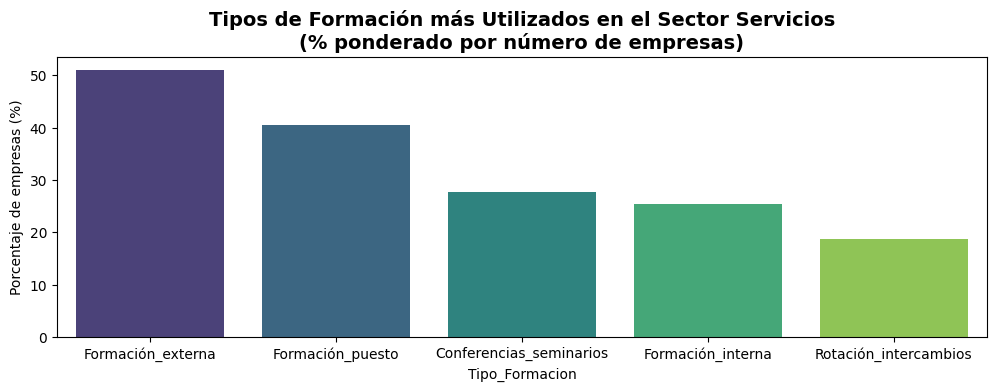

In [ ]:
# Grafico de barras
df_visual = pd.DataFrame(list(resultados_ordenados.items()), 
                      columns=['Tipo_Formacion', 'Porcentaje'])

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
ax = sns.barplot(data=df_visual, x='Tipo_Formacion', y='Porcentaje', 
                 palette='viridis', hue='Tipo_Formacion', legend=False)

plt.title('Tipos de Formación más Utilizados en el Sector Servicios\n(% ponderado por número de empresas)', 
          fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje de empresas (%)')
plt.xticks(rotation=0, ha='center')